In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv
import os
import math

In [68]:
curr_dir = os.getcwd()
data_set_folder = 'knn-dataset'
data_dir = os.path.join(curr_dir, data_set_folder)
print(data_dir)


d:\Education\Artifital intellegence\CS480\CS480-680_introduction_to_MachineLearning\Assignment1\knn-dataset


In [57]:
data_dir_list = []
for sd, d, files in os.walk(data_dir):
    for file in files:
        data_dir_list.append(os.path.join(sd, file))
print(data_dir_list[2])
print(data_dir_list[11])

d:\Education\Artifital intellegence\CS480\CS480-680_introduction_to_MachineLearning\Assignment1\knn-dataset\trainData1.csv
d:\Education\Artifital intellegence\CS480\CS480-680_introduction_to_MachineLearning\Assignment1\knn-dataset\trainData9.csv


In [258]:
def getFiles(dataset_folder_name):
    data_dir_lst = []
    cur_dir = os.getcwd()
    data_dir = os.path.join(cur_dir, dataset_folder_name)
    for sd, s, files in os.walk(data_dir):
        for file in files:
            data_dir_lst.append(os.path.join(sd, file))
    return data_dir_lst

#[2:11] --> trainData
#[12:]  --> trainLabels

def getDataFrame(dir):
    data = pd.read_csv(data_path)
    return data.values

# get mean and satandard division, then calaculate normalization

def normalization(data_row):
    max_val = np.max(data_row)
    min_val = np.min(data_row)
    normalized = [((i-min_val)/max_val-min_val) for i in data_row]
    return normalized


def standarization(data_row):
    mean = np.sum(data_row)/len(data_row)
    lst = [math.pow((i - mean), 2)  for i in data_row]
    standard_dev = np.sqrt(np.sum(lst)*(1/len(data_row)))
    standarized = [(i-mean)/standard_dev for i in data_row]
    return standarized

def plot_hist(data, no_bins):
    plt.hist(data, bins = no_bins)
    plt.show()

def preprocess_data(img):
    vectorize_img = np.reshape(img, (64, 1))
    return vectorize_img

def cross_validation(dataset, labels, validation, shuffle = False):
    if shuffle:
        np.random.shuffle(data_set)
    spliter = int(validation * data_set.shape[0])
    valid_set = data_set[0: spliter]
    traning_set = data_set[spliter:data_set.shape[0]]

    valid_set_labels = labels[0: spliter]
    traning_set_labels = labels[spliter:labels.shape[0]]

    return traning_set, traning_set_labels, valid_set, valid_set_labels

def Euclidean_distance(img1, img2):
    distance = 0
    for counter in range(len(img2)): 
        distance = (img1[counter] - img2[counter])**2
    return math.sqrt(distance)

def sample_of_data(img):
    img = img.reshape((8, 8))
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.show()

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0


In [ ]:
list_of_dirs = getFiles('knn-dataset')
test_set_dir = list_of_dirs[0:2] #data index = 0, label index = 1
train_data_dirs = list_of_dirs[2:11]
train_labels_dirs = list_of_dirs[12:]
distance = []
neighbors = []
num_neighbors = 5
for D_fold, L_fold in zip(train_data_dirs, train_labels_dirs):
    D_fold_data = getDataFrame(D_fold)
    L_fold_data = getDataFrame(L_fold)
    training_data_set, training_labels_set, validation_data_set, validation_labels_set  = cross_validation(D_fold_data, L_fold_data, 0.2)  
    
    for index in range(training_data_set.shape[0]):
        vec_row = preprocess_data(training_data_set[index])
        # norm_row = normalization(vec_row)
        stnd_row = standarization(vec_row)
        distances.append((Euclidean_distance(test_img, stnd_row), training_labels_set[index], stnd_row))
    distances.sort(key=lambda tup: tup[0])
    for i in range(num_neighbors):
        neighbors.append((distances[i][2], distances[i][1]))





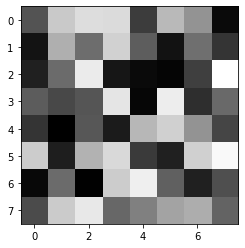

In [60]:
a = np.random.random((8,8))
plt.figure()
plt.imshow(a, cmap='gray')
plt.show()

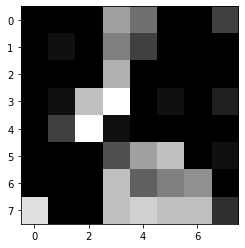

In [104]:
# sample of data
img = data_set[np.random.randint(0, 99)].reshape((8, 8))
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()